<a id='0'></a>
# Оглавление

2. [Задание](#1)<br>
3. [Описание датасета](#2)<br>
4. [Импорт библиотек](#3)<br>
5. [Загрузка и первичный анализ данных](#4)<br>
6. [Построение модели](#5)<br>
7. [Сравнение моделей](#6)<br>

<a id="1"></a>
# Задание ([к оглавлению](#0))

Схема типового исследования, проводимого студентом в рамках курсовой работы, содержит выполнение следующих шагов:

1. Поиск и выбор набора данных для построения моделей машинного обучения. На основе выбранного набора данных студент должен построить модели машинного обучения для решения или задачи классификации, или задачи регрессии.
2. Проведение разведочного анализа данных. Построение графиков, необходимых для понимания структуры данных. Анализ и заполнение пропусков в данных.
3. Выбор признаков, подходящих для построения моделей. Кодирование категориальных признаков. Масштабирование данных. Формирование вспомогательных признаков, улучшающих качество моделей.
4. Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения. В зависимости от набора данных, порядок выполнения пунктов 2, 3, 4 может быть изменен.
5. Выбор метрик для последующей оценки качества моделей. Необходимо выбрать не менее трех метрик и обосновать выбор.
6. Выбор наиболее подходящих моделей для решения задачи классификации или регрессии. Необходимо использовать не менее пяти моделей, две из которых должны быть ансамблевыми.
7. Формирование обучающей и тестовой выборок на основе исходного набора данных.
8. Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки.
9. Подбор гиперпараметров для выбранных моделей. Рекомендуется использовать методы кросс-валидации. В зависимости от используемой библиотеки можно применять функцию GridSearchCV, использовать перебор параметров в цикле, или использовать другие методы.
10. Повторение пункта 8 для найденных оптимальных значений гиперпараметров. Сравнение качества полученных моделей с качеством baseline-моделей.
11. Формирование выводов о качестве построенных моделей на основе выбранных метрик. Результаты сравнения качества рекомендуется отобразить в виде графиков и сделать выводы в форме текстового описания. Рекомендуется построение графиков обучения и валидации, влияния значений гиперпарметров на качество моделей и т.д.

<a id="2"></a>
# Описание датасета ([к оглавлению](#0))

Digital payments are evolving, but so are cyber criminals.

According to the Data Breach Index, more than 5 million records are being stolen on a daily basis, a concerning statistic that shows - fraud is still very common both for Card-Present and Card-not Present type of payments.

In today’s digital world where trillions of Card transaction happens per day, detection of fraud is challenging.


This Dataset sourced by some unnamed institute.

---

**Feature Explanation:**

`distancefromhome` - the distance from home where the transaction happened.

`distancefromlast_transaction` - the distance from last transaction happened.

`ratiotomedianpurchaseprice` - Ratio of purchased price transaction to median purchase price.

`repeat_retailer` - Is the transaction happened from same retailer.

`used_chip` - Is the transaction through chip (credit card).

`usedpinnumber` - Is the transaction happened by using PIN number.

`online_order` - Is the transaction an online order.

`fraud` - Is the transaction fraudulent.

<a id="3"></a>
# Импорт библиотек ([к оглавлению](#0))

In [32]:
import numpy as np
import pandas as pd

from io import StringIO 
import graphviz
import pydotplus
from IPython.core.display import HTML, Image
from operator import itemgetter
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler, OrdinalEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier, export_text, export_graphviz
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier

from sklearn.pipeline import Pipeline
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

<a id="4"></a>
# Загрузка и первичный анализ данных ([к оглавлению](#0))

## Первичный анализ

In [33]:
df = pd.read_csv("./card_transdata.csv")
df = df.head(100000)
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   distance_from_home              100000 non-null  float64
 1   distance_from_last_transaction  100000 non-null  float64
 2   ratio_to_median_purchase_price  100000 non-null  float64
 3   repeat_retailer                 100000 non-null  float64
 4   used_chip                       100000 non-null  float64
 5   used_pin_number                 100000 non-null  float64
 6   online_order                    100000 non-null  float64
 7   fraud                           100000 non-null  float64
dtypes: float64(8)
memory usage: 6.1 MB


In [35]:
df = df.rename(columns={
    "distance_from_home": "dist_home",
    "distance_from_last_transaction": "dist_last",
    "ratio_to_median_purchase_price": "ratio",
    "repeat_retailer": "repeat",
    "used_chip": "chip",
    "used_pin_number": "pin",
    "online_order": "online"
})
df.head()

,dist_home,dist_last,ratio,repeat,chip,pin,online,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [36]:
cat_features = [
    "repeat",
    "chip",
    "pin",
    "online"
]

num_features = [
    "dist_home",
    "dist_last",
    "ratio"
]

target_feature = "fraud"
df[target_feature] = df[target_feature].astype(int)

for feat in cat_features:
    df[feat] = df[feat].astype(int)

df.head()

,dist_home,dist_last,ratio,repeat,chip,pin,online,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0
3,2.247564,5.600044,0.362663,1,1,0,1,0
4,44.190936,0.566486,2.222767,1,1,0,1,0


In [37]:
df.describe()

,dist_home,dist_last,ratio,repeat,chip,pin,online,fraud
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,26.688487,5.023716,1.819374,0.882090,0.351060,0.103250,0.650660,0.087100
std,65.132078,24.439420,2.912849,0.322503,0.477304,0.304287,0.476764,0.281983
min,0.021322,0.000488,0.011373,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.864892,0.295815,0.476392,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.965281,0.996695,0.996081,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.726777,3.333064,2.089016,1.000000,1.000000,0.000000,1.000000,0.000000
max,4601.011222,2160.499922,266.689692,1.000000,1.000000,1.000000,1.000000,1.000000


## Корреляционный анализ

In [38]:
corr = df.corr()
corr

,dist_home,dist_last,ratio,repeat,chip,pin,online,fraud
dist_home,1.000000,-0.002562,-0.000656,0.143589,-0.002928,0.002518,-0.000250,0.187143
dist_last,-0.002562,1.000000,0.000531,-0.006873,0.000284,0.001851,-0.001003,0.097031
ratio,-0.000656,0.000531,1.000000,-0.001365,-0.000684,0.001522,0.002817,0.441085
repeat,0.143589,-0.006873,-0.001365,1.000000,-0.002641,-0.002301,0.003508,-0.002200
chip,-0.002928,0.000284,-0.000684,-0.002641,1.000000,-0.000048,-0.001629,-0.062392
pin,0.002518,0.001851,0.001522,-0.002301,-0.000048,1.000000,0.000616,-0.101431
online,-0.000250,-0.001003,0.002817,0.003508,-0.001629,0.000616,1.000000,0.192710
fraud,0.187143,0.097031,0.441085,-0.002200,-0.062392,-0.101431,0.192710,1.000000


In [39]:
corr[target_feature]

dist_home    0.187143
dist_last    0.097031
ratio        0.441085
repeat      -0.002200
chip        -0.062392
pin         -0.101431
online       0.192710
fraud        1.000000
Name: fraud, dtype: float64

<Axes: >

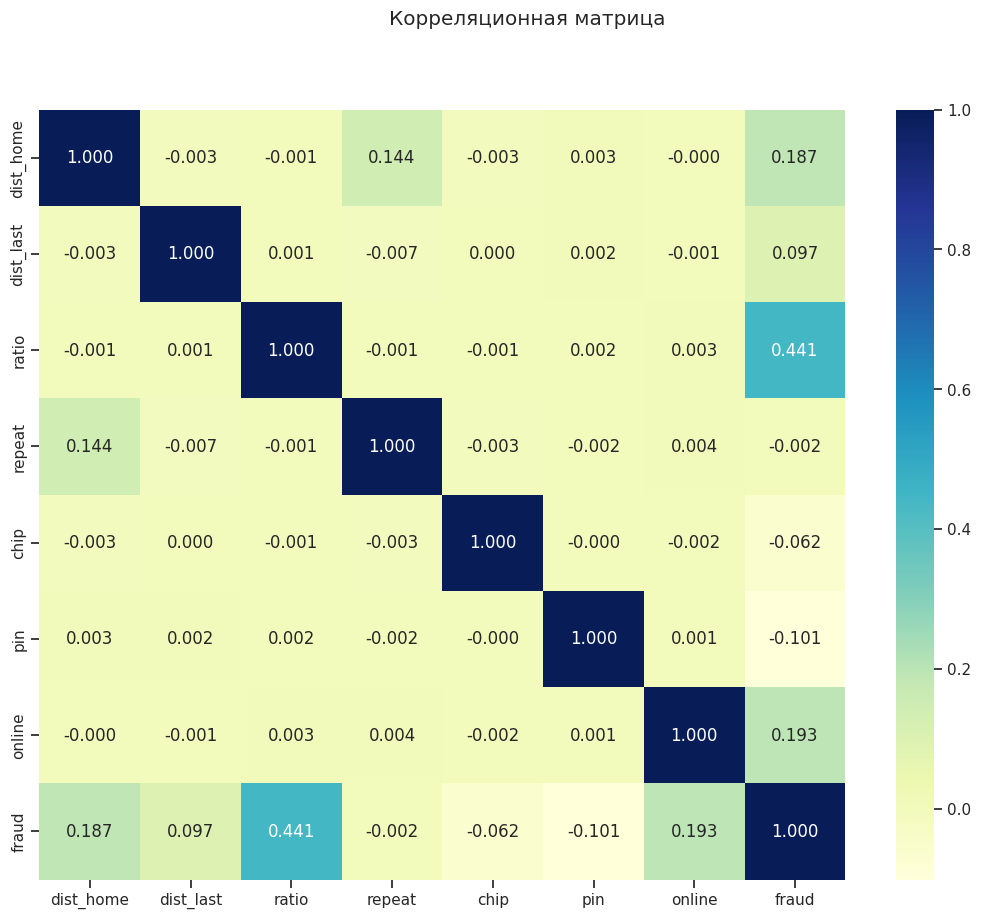

In [40]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(13,10))
fig.suptitle('Корреляционная матрица')
sns.heatmap(corr, ax=ax, annot=True, fmt='.3f', cmap='YlGnBu')

<a id="5"></a>
# Построение модели ([к оглавлению](#0))

## Разделение выборки

In [41]:
# Отрисовка ROC-кривой
def draw_roc_curve(y_true, y_score, pos_label, average):
    fpr, tpr, thresholds = roc_curve(y_true, y_score, pos_label=pos_label)
    roc_auc_value = roc_auc_score(y_true, y_score, average=average)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_value)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [42]:
# Тестовая и обучающая выборки
X = df.loc[:, df.columns != target_feature]
y = df[target_feature]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [43]:
preprocess = ColumnTransformer([('continuous', StandardScaler(), num_features),
                               ('categorial', OrdinalEncoder(), cat_features)])

X_train_preprocessed = preprocess.fit_transform(X_train)
X_test_preprocessed = preprocess.fit_transform(X_test)

In [44]:
precision_bar_baseline = {}
recall_bar_baseline = {}
roc_auc_score_bar_baseline = {}

## Baseline модели

### Логистическая регрессия

In [45]:
%%time
lgs_rg_baseline = LogisticRegression()
lgs_rg_baseline.fit(X_train_preprocessed, y_train)

CPU times: user 759 ms, sys: 846 ms, total: 1.6 s
Wall time: 149 ms


LogisticRegression()

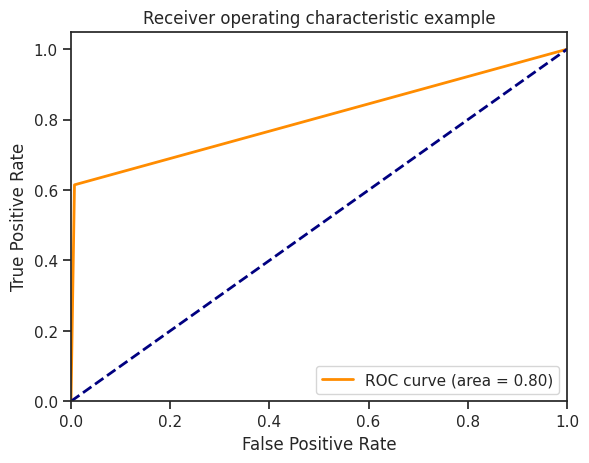

(0.8932443703085905, 0.6148105625717566)

In [47]:
predict = lgs_rg_baseline.predict(X_test_preprocessed)

draw_roc_curve(y_test, predict, pos_label=1, average='micro')
precision_score(y_test, predict), recall_score(y_test, predict)

In [48]:
precision_bar_baseline["LogisticRegression"] = precision_score(y_test, predict)
recall_bar_baseline["LogisticRegression"] = recall_score(y_test, predict)
roc_auc_score_bar_baseline["LogisticRegression"] = roc_auc_score(y_test, predict, average='micro')

### Машина опорных векторов

In [49]:
%%time
svc_baseline = SVC(kernel='rbf', C=1E6)
svc_baseline.fit(X_train_preprocessed, y_train)

CPU times: user 9.88 s, sys: 44.4 ms, total: 9.92 s
Wall time: 9.92 s


SVC(C=1000000.0)

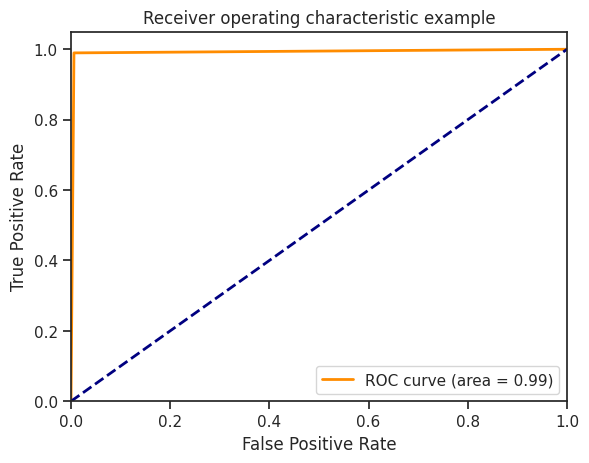

(0.9405346426623022, 0.9896670493685419)

In [50]:
predict = svc_baseline.predict(X_test_preprocessed)

draw_roc_curve(y_test, predict, pos_label=1, average='micro')
precision_score(y_test, predict), recall_score(y_test, predict)

In [51]:
precision_bar_baseline["SVC"] = precision_score(y_test, predict)
recall_bar_baseline["SVC"] = recall_score(y_test, predict)
roc_auc_score_bar_baseline["SVC"] = roc_auc_score(y_test, predict, average='micro')

### Дерево решений

In [52]:
%%time
dcs_tree_baseline = DecisionTreeClassifier(random_state=1)
dcs_tree_baseline.fit(X_train, y_train)

CPU times: user 89.7 ms, sys: 495 µs, total: 90.2 ms
Wall time: 89.4 ms


DecisionTreeClassifier(random_state=1)

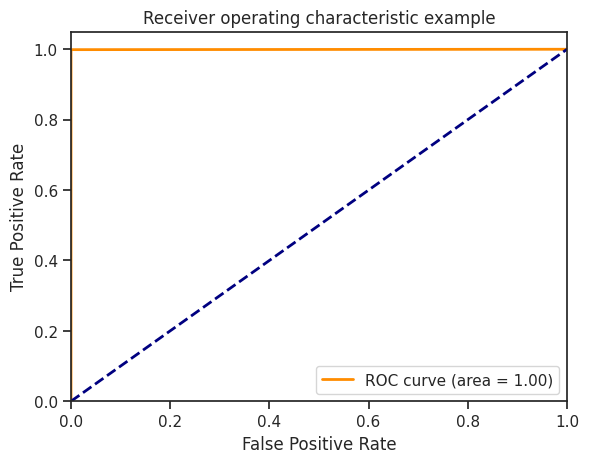

(0.9994256174612292, 0.9988518943742825)

In [55]:
predict = dcs_tree_baseline.predict(X_test)

draw_roc_curve(y_test, predict, pos_label=1, average='micro')
precision_score(y_test, predict), recall_score(y_test, predict)

In [56]:
precision_bar_baseline["DecisionTreeClassifier"] = precision_score(y_test, predict)
recall_bar_baseline["DecisionTreeClassifier"] = recall_score(y_test, predict)
roc_auc_score_bar_baseline["DecisionTreeClassifier"] = roc_auc_score(y_test, predict, average='micro')

### Случайный лес

In [57]:
%%time
rand_fst_baseline = RandomForestClassifier()
rand_fst_baseline.fit(X_train, y_train)

CPU times: user 3.54 s, sys: 0 ns, total: 3.54 s
Wall time: 3.53 s


RandomForestClassifier()

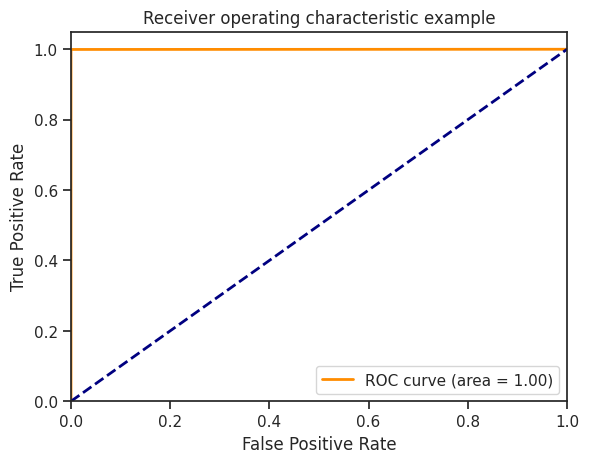

(1.0, 0.9994259471871412)

In [64]:
predict = rand_fst_baseline.predict(X_test)

draw_roc_curve(y_test, predict, pos_label=1, average='micro')
precision_score(y_test, predict), recall_score(y_test, predict)

In [65]:
precision_bar_baseline["RandomForestClassifier"] = precision_score(y_test, predict)
recall_bar_baseline["RandomForestClassifier"] = recall_score(y_test, predict)
roc_auc_score_bar_baseline["RandomForestClassifier"] = roc_auc_score(y_test, predict, average='micro')

### Бэггинг с деревьями решений

In [66]:
%%time
bagg_baseline = BaggingClassifier()
bagg_baseline.fit(X_train, y_train)

CPU times: user 665 ms, sys: 3.95 ms, total: 669 ms
Wall time: 668 ms


BaggingClassifier()

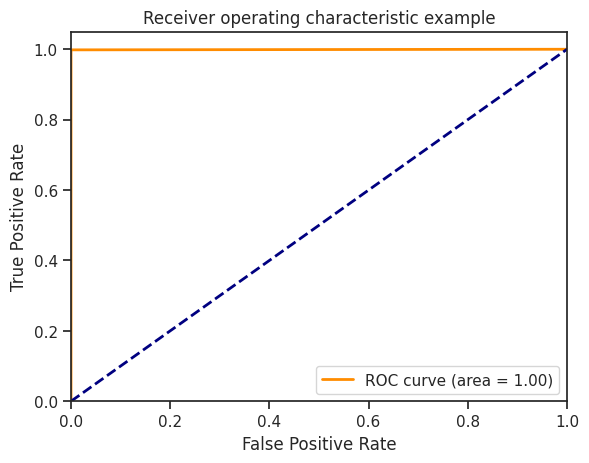

(0.9994252873563219, 0.9982778415614236)

In [69]:
predict = bagg_baseline.predict(X_test)

draw_roc_curve(y_test, predict, pos_label=1, average='micro')
precision_score(y_test, predict), recall_score(y_test, predict)

In [70]:
precision_bar_baseline["BaggingClassifier"] = precision_score(y_test, predict)
recall_bar_baseline["BaggingClassifier"] = recall_score(y_test, predict)
roc_auc_score_bar_baseline["BaggingClassifier"] = roc_auc_score(y_test, predict, average='micro')

### Градиентный бустинг

In [71]:
%%time
boost_baseline = GradientBoostingClassifier()
boost_baseline.fit(X_train, y_train)

CPU times: user 8.09 s, sys: 6.06 ms, total: 8.09 s
Wall time: 8.09 s


GradientBoostingClassifier()

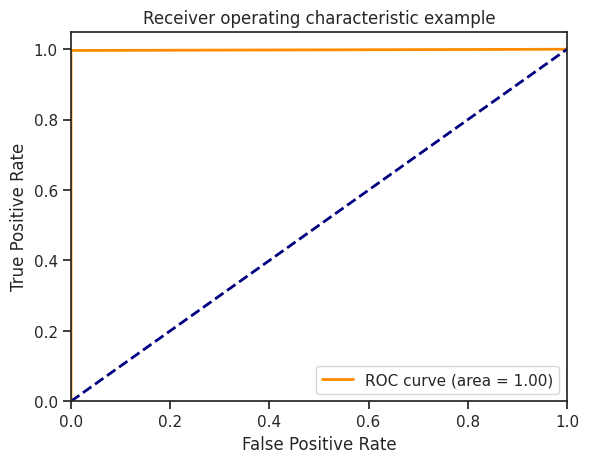

(1.0, 0.9965556831228473)

In [72]:
predict = boost_baseline.predict(X_test)

draw_roc_curve(y_test, predict, pos_label=1, average='micro')
precision_score(y_test, predict), recall_score(y_test, predict)

In [73]:
precision_bar_baseline["GradientBoostingClassifier"] = precision_score(y_test, predict)
recall_bar_baseline["GradientBoostingClassifier"] = recall_score(y_test, predict)
roc_auc_score_bar_baseline["GradientBoostingClassifier"] = roc_auc_score(y_test, predict, average='micro')

## Подбор гипперпараметров

In [74]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5), scoring='accuracy'):
   
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel(scoring)
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.3,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [75]:
def plot_validation_curve(estimator, title, X, y, 
                          param_name, param_range, cv, 
                          scoring='accuracy'):
                                                   
    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range,
        cv=cv, scoring=scoring, n_jobs=1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel(str(scoring))
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.plot(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.4,
                     color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    return plt

In [76]:
precision_bar = {}
recall_bar = {}
roc_auc_score_bar = {}

### Логистическая регрессия

In [77]:
%%time

lgs_rg_cv = LogisticRegressionCV(cv=5, random_state=0, Cs=np.logspace(-10, 10, 10))
lgs_rg_cv.fit(X_train_preprocessed, y_train)

CPU times: user 18.6 s, sys: 21.5 s, total: 40.2 s
Wall time: 3.62 s


LogisticRegressionCV(Cs=array([1.00000000e-10, 1.66810054e-08, 2.78255940e-06, 4.64158883e-04,
       7.74263683e-02, 1.29154967e+01, 2.15443469e+03, 3.59381366e+05,
       5.99484250e+07, 1.00000000e+10]),
                     cv=5, random_state=0)

In [78]:
lgs_rg_cv.C_

array([2154.43469003])

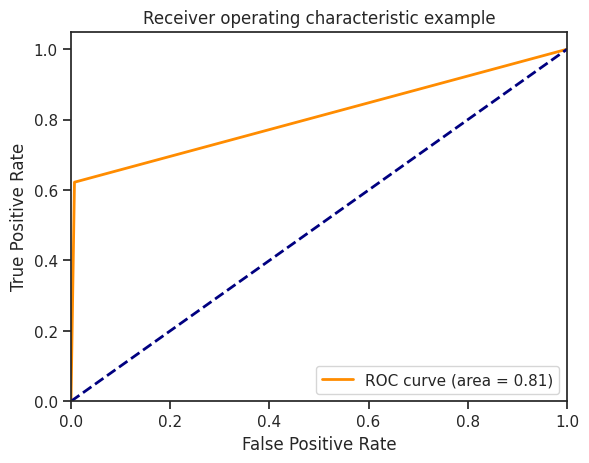

(0.8943894389438944, 0.6222732491389208)

In [80]:
predict = lgs_rg_cv.predict(X_test_preprocessed)


draw_roc_curve(y_test, predict, pos_label=1, average='micro')
precision_score(y_test, predict), recall_score(y_test, predict)

In [81]:
precision_bar["LogisticRegression"] = precision_score(y_test, predict)
recall_bar["LogisticRegression"] = recall_score(y_test, predict)
roc_auc_score_bar["LogisticRegression"] = roc_auc_score(y_test, predict, average='micro')

### Машина опорных векторов

In [ ]:
%%time

params = {
    'kernel': ['poly', 'rbf', 'sigmoid'],
    'C': np.logspace(-2, 2, 5)
}

svc_cv = GridSearchCV(SVC(),
                           param_grid=params,
                           cv=5,
                           scoring='recall',
                           n_jobs=-1
)


svc_cv.fit(X_train_preprocessed, y_train)

In [ ]:
svc_cv.best_params_

In [ ]:
predict = svc_cv.predict(X_test_preprocessed)

draw_roc_curve(y_test, predict, pos_label=1, average='micro')
precision_score(y_test, predict), recall_score(y_test, predict)

In [ ]:
precision_bar["SVC"] = precision_score(y_test, predict)
recall_bar["SVC"] = recall_score(y_test, predict)
roc_auc_score_bar["SVC"] = roc_auc_score(y_test, predict, average='micro')

### Дерево решений

In [ ]:
%%time

params = {
    'min_samples_leaf': [1, 2, 3, 4, 5, 6],
    'criterion': ["entropy", "gini"]
}

dsc_tree_cv = GridSearchCV(DecisionTreeClassifier(random_state=1),
                           param_grid=params,
                           cv=5,
                           scoring='recall',
                           n_jobs=-1
)

dsc_tree_cv.fit(X_train, y_train)

In [ ]:
dsc_tree_cv.best_params_

In [ ]:
predict = dsc_tree_cv.predict(X_test)

draw_roc_curve(y_test, predict, pos_label=1, average='micro')
precision_score(y_test, predict), recall_score(y_test, predict)

In [ ]:
precision_bar["DecisionTreeClassifier"] = precision_score(y_test, predict)
recall_bar["DecisionTreeClassifier"] = recall_score(y_test, predict)
roc_auc_score_bar["DecisionTreeClassifier"] = roc_auc_score(y_test, predict, average='micro')

### Случайный лес

In [ ]:
%%time

params = {
    'n_estimators': np.arange(10, 100, 10),
    'criterion': ["entropy", "gini"]
}

rand_fst_cv = GridSearchCV(RandomForestClassifier(),
                           param_grid=params,
                           cv=5,
                           scoring='recall',
                           n_jobs=-1
)

rand_fst_cv.fit(X_train, y_train)

In [ ]:
rand_fst_cv.best_params_

In [ ]:
predict = rand_fst_cv.predict(X_test)

draw_roc_curve(y_test, predict, pos_label=1, average='micro')
precision_score(y_test, predict), recall_score(y_test, predict)

In [ ]:
precision_bar["RandomForestClassifier"] = precision_score(y_test, predict)
recall_bar["RandomForestClassifier"] = recall_score(y_test, predict)
roc_auc_score_bar["RandomForestClassifier"] = roc_auc_score(y_test, predict, average='micro')

### Бэггинг с деревьями решений

In [ ]:
%%time

params = {
    'base_estimator__max_depth': [1, 3, 5],
    'n_estimators': np.arange(10, 100, 10),
    'max_samples': [0.05, 0.1, 0.2, 0.5]
}

bagg_cv = GridSearchCV(BaggingClassifier(DecisionTreeClassifier(), random_state=0),
                       param_grid=params,
                       cv=5,
                       scoring='recall',
                       n_jobs=-1
)

bagg_cv.fit(X_train, y_train)

In [ ]:
bagg_cv.best_params_

In [ ]:
predict = bagg_cv.predict(X_test)

draw_roc_curve(y_test, predict, pos_label=1, average='micro')
precision_score(y_test, predict), recall_score(y_test, predict)

In [ ]:
precision_bar["BaggingClassifier"] = precision_score(y_test, predict)
recall_bar["BaggingClassifier"] = recall_score(y_test, predict)
roc_auc_score_bar["BaggingClassifier"] = roc_auc_score(y_test, predict, average='micro')

### Градиентный бустинг

In [ ]:
%%time

params = {
    "n_estimators": [1, 3, 5, 7],
    "learning_rate": [1, 10, 100]
}

boost_cv = GridSearchCV(GradientBoostingClassifier(),
                       param_grid=params,
                       cv=5,
                       scoring='recall',
                       n_jobs=-1
)

boost_cv.fit(X_train, y_train)

In [ ]:
boost_cv.best_params_

In [ ]:
predict = boost_cv.predict(X_test)

draw_roc_curve(y_test, predict, pos_label=1, average='micro')
precision_score(y_test, predict), recall_score(y_test, predict)

In [ ]:
precision_bar["GradientBoostingClassifier"] = precision_score(y_test, predict)
recall_bar["GradientBoostingClassifier"] = recall_score(y_test, predict)
roc_auc_score_bar["GradientBoostingClassifier"] = roc_auc_score(y_test, predict, average='micro')

<a id="6"></a>
# Сравнение моделей ([к оглавлению](#0))

In [ ]:
def print_results(ylabel, labels, first_means_in, second_means_in):
    first_means = []
    second_means = []
    
    precision = 4
    
    for v in first_means_in:
        first_means.append(round(v, precision))
    
    for v in second_means_in:
        second_means.append(round(v, precision))
    
        
    width = 0.35  # the width of the bars
    x = np.arange(len(labels))  # the label locations
    
    fig, ax = plt.subplots(figsize=(12,7))

    rects1 = ax.bar(x - width/2, first_means, width, label='Baseline')
    rects2 = ax.bar(x + width/2, second_means, width, label='Best Estimator')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(ylabel)
    ax.set_ylim([0.5, 1.1])
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    ax.bar_label(rects1, padding=3)
    ax.bar_label(rects2, padding=3)

    fig.tight_layout()

    plt.show()

In [ ]:
print_results("precision",
              precision_bar.keys(),
              precision_bar_baseline.values(),
              precision_bar.values())

print_results("recall",
              recall_bar.keys(),
              recall_bar_baseline.values(),
              recall_bar.values())

print_results("roc_auc_score",
              roc_auc_score_bar.keys(),
              roc_auc_score_bar_baseline.values(),
              roc_auc_score_bar.values())

`Наилучше всего из себя показали модели DecisionTreeClassifier и RandomForestClassifier`